# Algoritmo Supervisionado
Algoritmo supervisionado é o algoritmo que possui uma classe alvo, ou seja, sabemos o que o modelo deseja prever.

Na área, é muito comum chamar a classe alvo de target (alvo em inglês)

No treinamento do modelo, é fornecido, ao algoritmo
de ML, um conjunto de exemplos de treinamento com
cada exemplo (registro) sendo formado por um vetor de
atributos (variáveis independentes) e o rótulo da classe
associada (variável dependente).

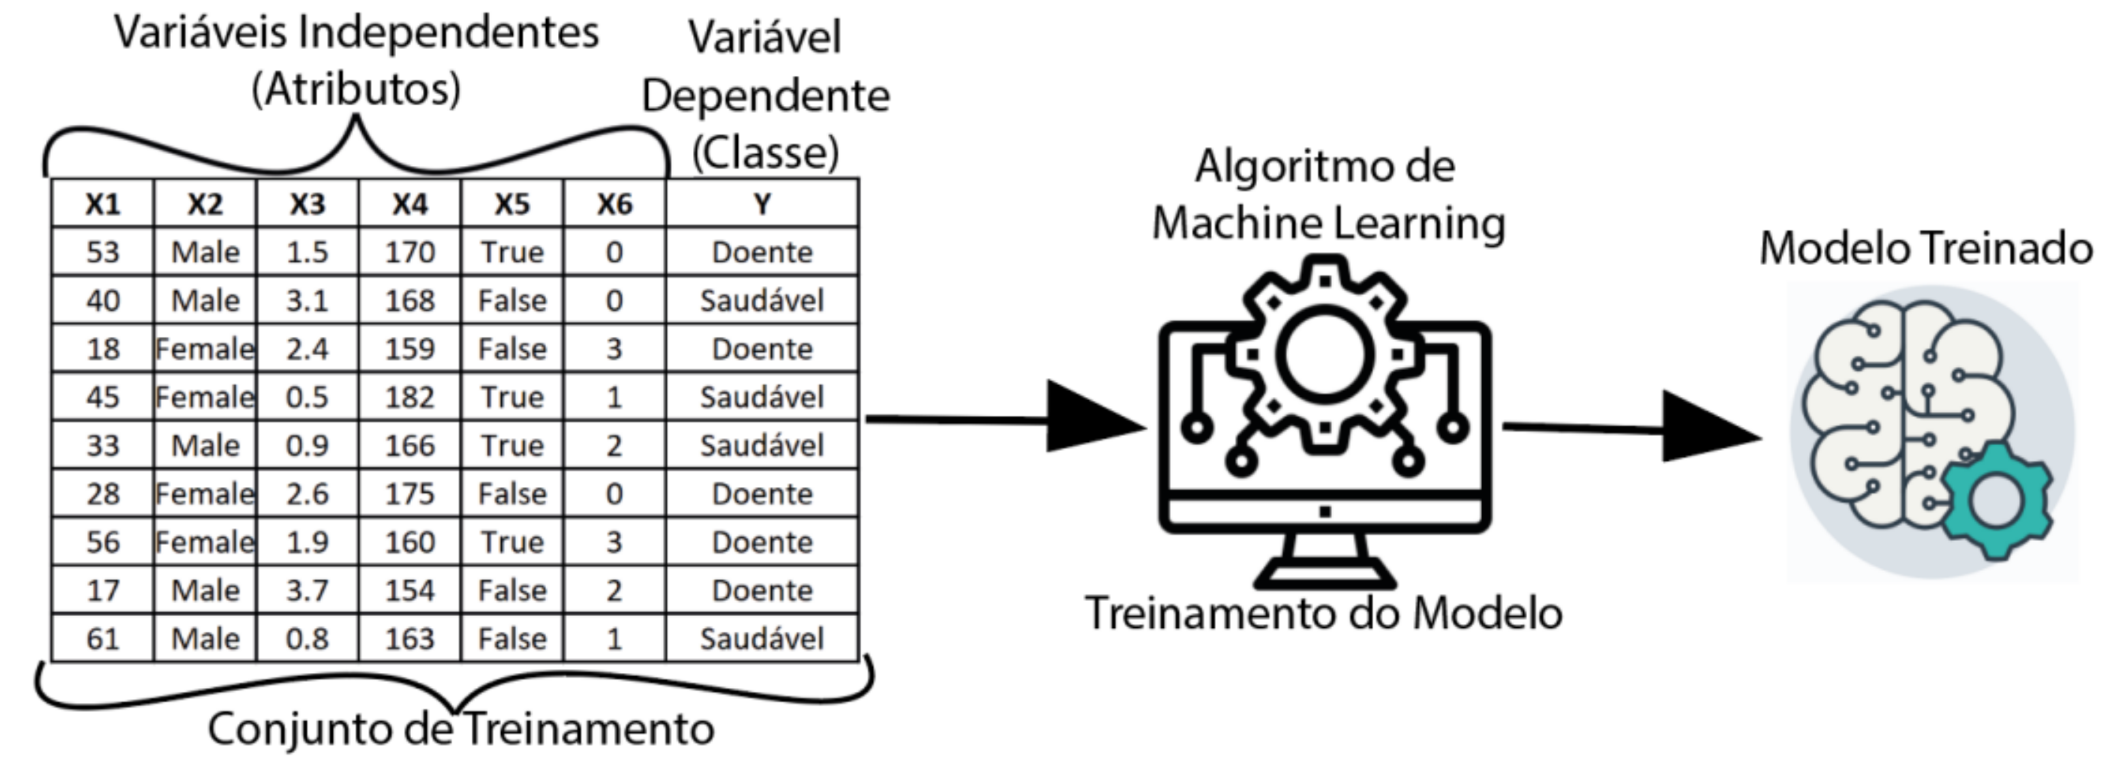

Exemplo de código para classificação supervisionada (Árvore de Decisão):

In [2]:
# Importa a biblioteca pandas com o apelido pd
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

In [4]:
# Realiza a leitura dos dados
df = pd.read_csv('iris.csv')

## Exploração da base de dados

In [5]:
df.head()

,comprimento sepala,largura sepala,comprimento petala,largura petala,flor
0,6.8,3.0,5.5,2.1,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.9,3.0,5.1,1.8,virginica
3,6.1,3.0,4.9,1.8,virginica
4,6.2,2.2,4.5,1.5,versicolor


Estamos trabalhando com um dataset com informações de pétalas e sépalas de 3 tipos de flores.

Para quem não sabe a diferença entre pétalas e sépalas:
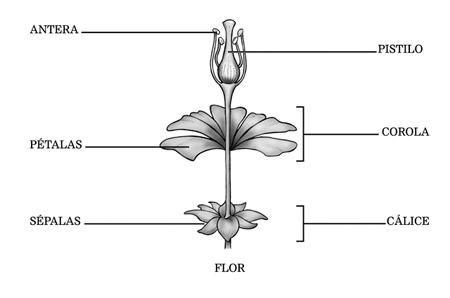

In [6]:
# Verificar quantos registros de cada alvo (flor)
df.flor.value_counts()

virginica     50
versicolor    50
setosa        50
Name: flor, dtype: int64

Repare que a cima podemos identificar que nossa base de dados está perfeitamente balanceada, tendo exatamente a mesma quantidade de registros de cada classe.

Uma base balanceada faz com que os modelos de machine learning "considerem" todas as classes com igual importância. Já uma base muito desbalanceada, pode fazer com que os modelos acertem mais as categorias com mais registros e errem mais as categorias com menos registros.

Ainda analisando os tipos de flores, segue uma imagem com exemplo de cada flor que temos na base de dados:
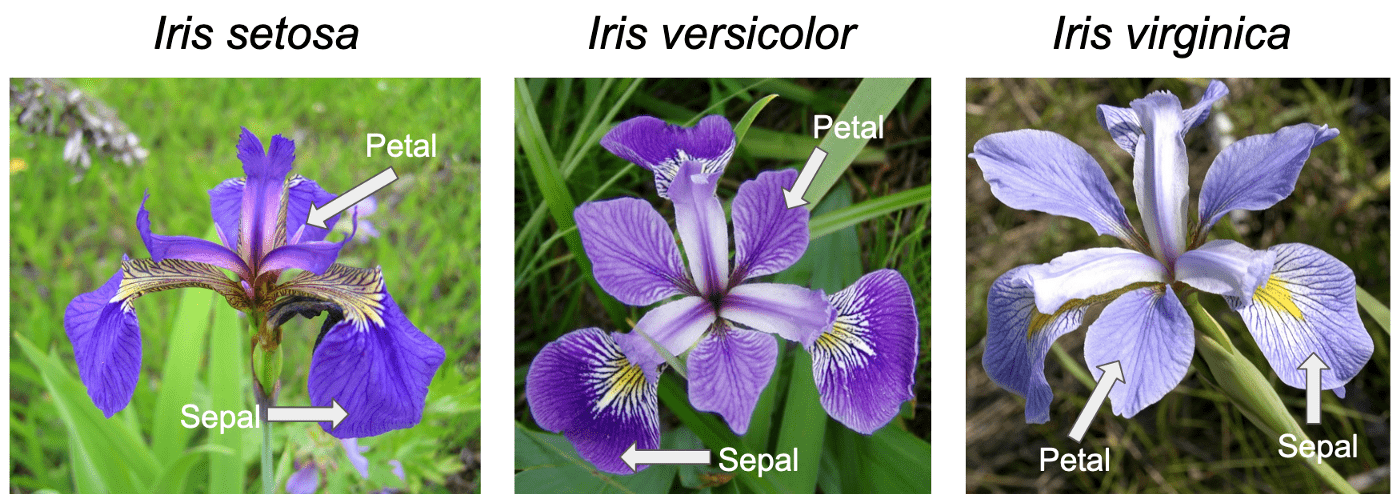

In [7]:
# Verificar quantidade de valores núlos por coluna
df.isna().sum()

comprimento sepala    0
largura sepala        0
comprimento petala    0
largura petala        0
flor                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento sepala  150 non-null    float64
 1   largura sepala      150 non-null    float64
 2   comprimento petala  150 non-null    float64
 3   largura petala      150 non-null    float64
 4   flor                150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,comprimento sepala,largura sepala,comprimento petala,largura petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.describe(include='O')

,flor
count,150
unique,3
top,virginica
freq,50


## Treinamento do modelo

In [18]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
# Separar entre x (atributos) e y (alvo)
X = df[df.columns[:-1]].values
y = df[['flor']].values

In [43]:
X

array([[6.8, 3. , 5.5, 2.1],
       [6. , 2.2, 4. , 1. ],
       [5.9, 3. , 5.1, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3.4, 1.5, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [4.8, 3. , 1.4, 0.1],
       [7.7, 2.8, 6.7, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [5.7, 2.9, 4.2, 1.3],
       [4.9, 3.6, 1.4, 0.1],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 3.3, 1.4, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [6.7, 3. , 5.2, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [5. , 3.5, 1.6, 0.6],
       [5.6, 2.8, 4.9, 2. ],
       [6.7, 3.1, 5.6, 2.4],
       [6. , 2.7, 5.1, 1.6],
       [6.6, 2.9, 4.6, 1.3],
       [6.1, 3. , 4.6, 1.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.8, 2.2],
       [5.1, 3.4, 1.5, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [6.4, 2.8, 5.6, 2.1],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.2, 2.8, 4.8, 1.8],
       [5.8, 2.7, 4.1, 1. ],
       [7.7, 2

In [ ]:
y

array([['virginica'],
       ['versicolor'],
       ['virginica'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
       ['versicolor'],
       ['setosa'],
       ['virginica'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['virginica'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['virginica'],
       ['virginica'],
       ['versicolor'],
       ['versicolor'],
       ['versicolor'],
       ['virginica'],
       ['virginica'],
       ['setosa'],
       ['setosa'],
       ['virginica'],
       ['versicolor'],
       ['versicolor'],
       ['virginica'],
       ['versicolor'],
       ['virginica'],
       ['setosa'],
       ['virginica'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['setosa'],
       ['virginica'],
       ['setosa'],
       ['virginica'],
       ['setosa'],
       ['versicolor'],
       ['ver

In [23]:
# Dividir o conjunto de dados em treino e teste com 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
# Define qual o modelo
clf = DecisionTreeClassifier()

# Treina o modelo de Árvore de Decisão
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Testar modelo supervisionado

In [25]:
# Faz previsões no conjunto de teste
y_predict = clf.predict(X_test)
y_predict

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

In [26]:
# Calculando a acurácia do modelo
acc = accuracy_score(y_test, y_predict)
print("Acurácia: {:.2f}%".format(acc * 100))

Acurácia: 90.00%


In [27]:
# Exibe as classes que o modelo foi treinado para identificar
clf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


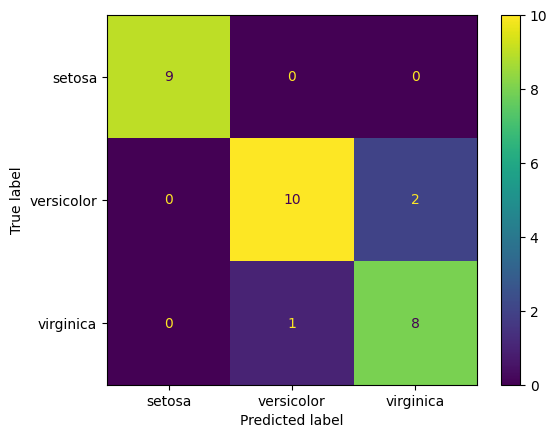

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predict), display_labels=clf.classes_).plot()

# Algoritmo não supervisionado

Algoritmo não supervisionado é o algoritmo que não possui uma classe alvo, ou seja, não sabemos o que o modelo deseja prever.

Geralmente os algoritmos não supervisionados geram clusters (grupos de registros semelhantes) que após gerados, ainda é necessário analisar o que o cluster representa.

O modelo identifica os registros com características semelhantes e os agrupa em clusters.

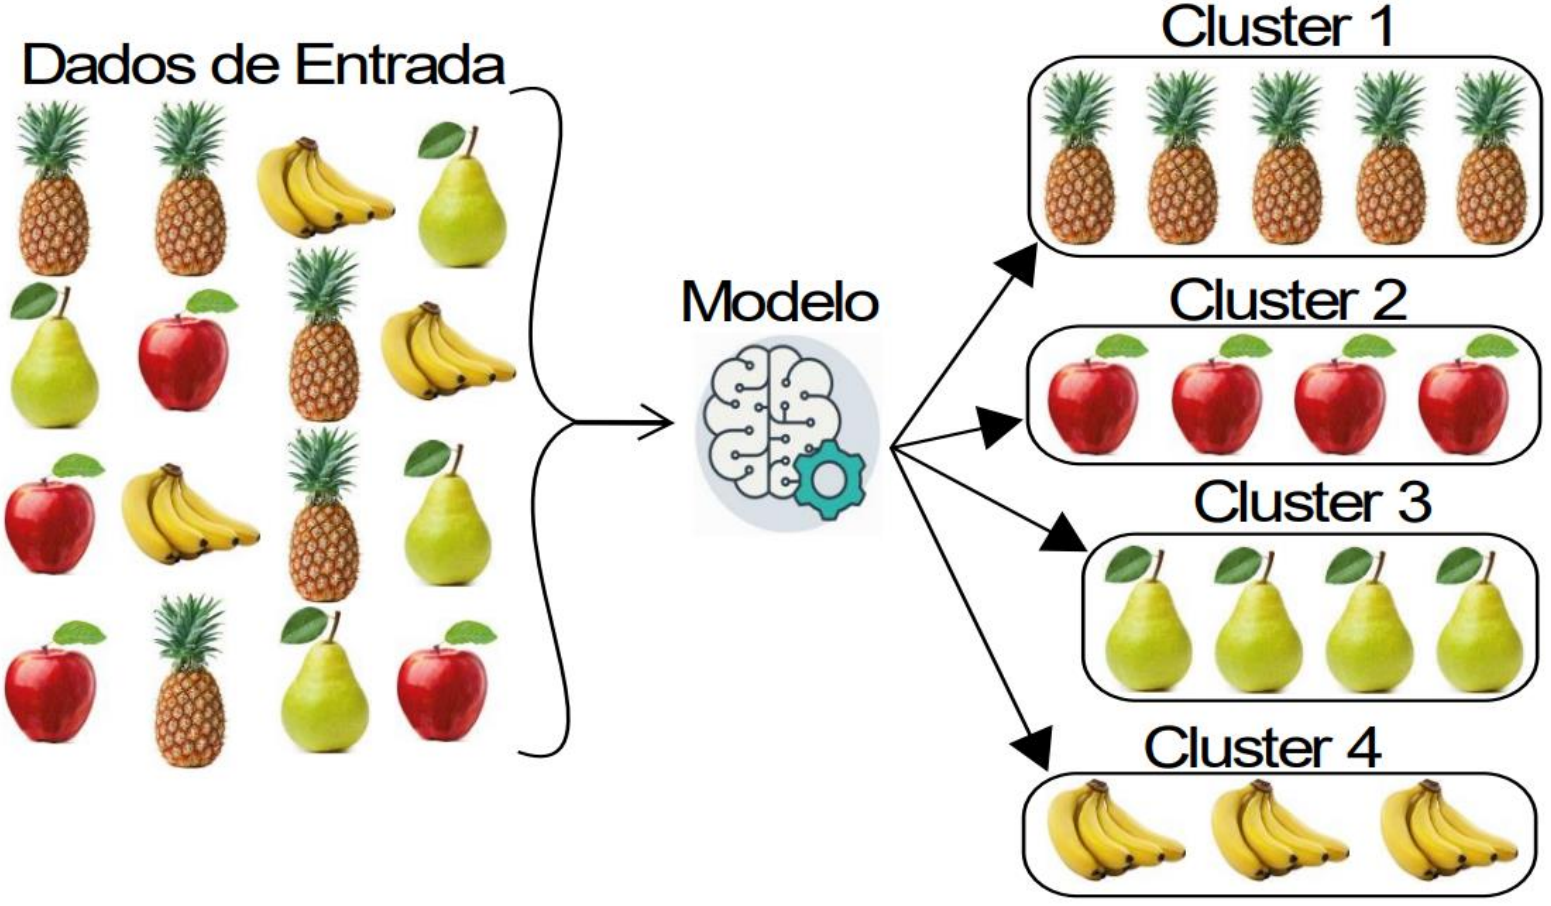

Exemplo de código para classificação não-supervisionada (K-means):

In [47]:
from sklearn.cluster import KMeans
#from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Realiza a leitura dos dados
df = pd.read_csv('iris.csv')

# Separa apenas os atributos para o treinamento (atributos são as "colunas" previsoras)
X = df[['comprimento sepala', 'largura sepala', 'comprimento petala', 'largura petala']].values

In [48]:
X.max()

7.9

In [49]:
X.min()

0.1

Repare que os valores máximos e mínimos não são tão discrepantes. Então neste caso, não irei normalizar os dados.

## Como calcular a quantidade de clusters?
Neste caso já sabemos que a quantidade de clusters é 3, mas caso não soubéssemos, usaríamos o método do cotovelo, conforme vems abaixo

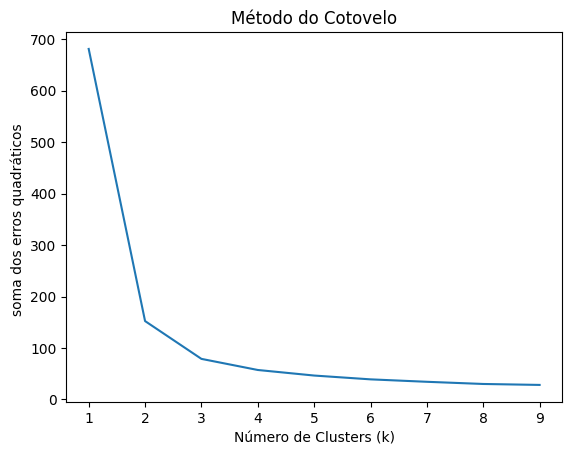

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from IPython.display import clear_output 

# Defina o intervalo de valores k
k_range = range(1, 10)

# Execute o algoritmo de clustering para cada valor k e armazene a soma dos erros quadráticos em uma lista
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_)
    # Limpa as mensagens de saída
    clear_output(wait = True)

# Trace a curva de cotovelo
plt.plot(k_range, sse)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('soma dos erros quadráticos ')
plt.title('Método do Cotovelo')
plt.show()

## Treinar / exibir clusters

In [51]:
# Treinando o modelo de K-means com 3 clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

C:\Users\gabriel.assis\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

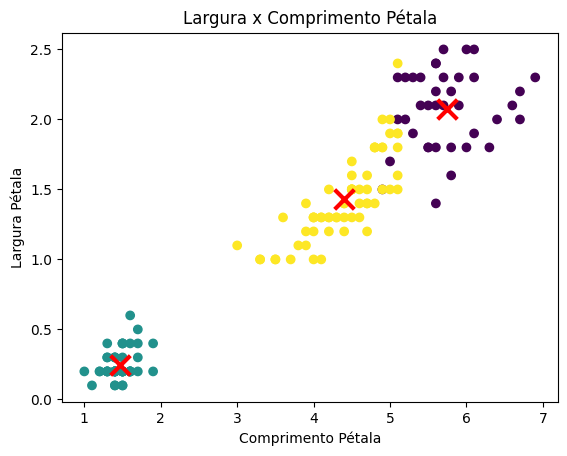

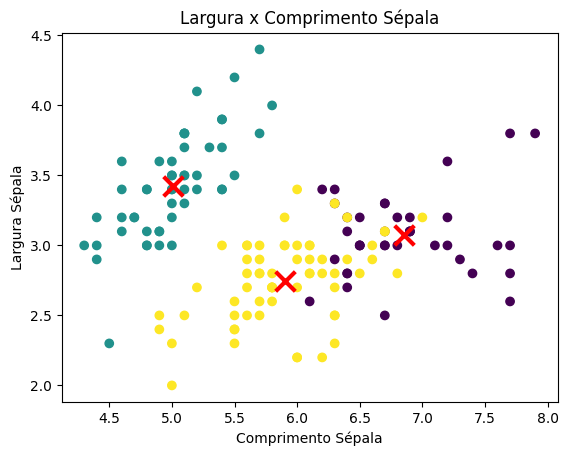

In [58]:
# Visualizando os clusters criados
plt.scatter(X[:, 2], X[:, 3], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker = 'x', s = 200, linewidths = 3, color = 'r')
plt.xlabel("Comprimento Pétala")
plt.ylabel("Largura Pétala")
plt.title('Largura x Comprimento Pétala')
plt.show()

# Visualizando os clusters criados
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'x', s = 200, linewidths = 3, color = 'r')
plt.xlabel("Comprimento Sépala")
plt.ylabel("Largura Sépala")
plt.title('Largura x Comprimento Sépala')
plt.show()

# Algoritmos Híbridos

São algoritmos que usam mais de um tipo de classificadores, podendo ser, por exemplo, a mistura de algoritmos supervisionados ou não supervisionados.

No geral, são menos utilizados pois geralmente possuem um nivel de complexidade muito elevado e nem sempre este nível de complexidade significa melhores reultados.

Com o algorítmo de Floresta aleatória (Random Forest Classifier), são reunídos vários tipos de árvores de decisão em uma floresta aleatória, que explora a diversidade das árvores para aprimorar o modelo resultante, que combina a saída de várias árvores de decisão para chegar a um único resultado. Sua facilidade de uso e flexibilidade alimentaram sua adoção, pois lida com problemas de classificação e regressão.


Exemplo de código para algoritmo híbrido (Floresta Aleatória):

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('iris.csv')
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

# Dividir o conjunto de dados em treino e teste com 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
# Treinando o modelo de Floresta Aleatória
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

C:\Users\gabriel.assis\AppData\Local\Temp\ipykernel_12280\122335529.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

Acurácia: 93.33%


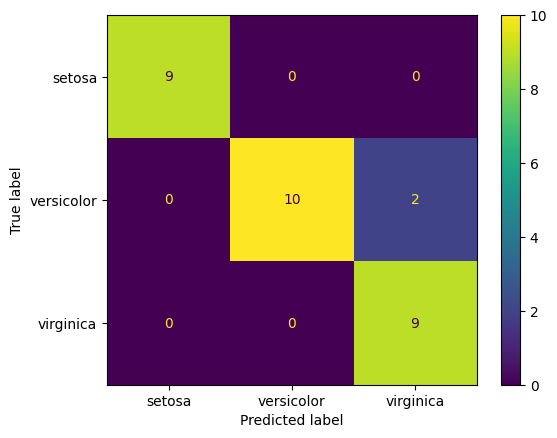

In [65]:
# Fazendo previsões no conjunto de teste
y_predict = clf.predict(X_test)

# Calculando a acurácia do modelo
acc = accuracy_score(y_test, y_predict)
print("Acurácia: {:.2f}%".format(acc * 100))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predict), display_labels = clf.classes_).plot()

# Exercício

* Realize a leitura da base de dados vinho.csv (a coluna nota representa a nota que o vinho possui, podemos levar ela em considereção para ser nossa classe alvo);

* Faça uma análise da base de dados;

* Trate os valores núlos, se houver;

* Separe os dados em X e y (normalize os dados de X se achar necessário);

* Separe os dados em treinamento e teste com 20% para teste;

* Escolha algum algoritmo para treinar com os dados de treinamento;

* Exiba a acurária e a matriz de confusão nos dados de teste.


## Resolução

### Realize a leitura da base de dados vinho.csv (a coluna nota representa a nota que o vinho possui, podemos levar ela em considereção para ser nossa classe alvo);

In [69]:
# Importar biblioteca
import pandas as pd

In [79]:
# Importar csv como dataframe
df = pd.read_csv('vinho.csv')

### Faça uma análise da base de dados;


In [80]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,nota
0,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2
1,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
2,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
3,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,1
4,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1


In [81]:
# Quantidade de linhas, colunas e tipo de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             175 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               176 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  nota 

In [82]:
# Estatísticas de cada coluna (média, valor máximo, valor mínimo, etc.)
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,nota
count,178.000000,178.000000,178.000000,175.000000,178.000000,178.000000,178.000000,178.000000,178.000000,176.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.543429,99.741573,2.295112,2.029270,0.361854,1.590899,5.053182,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.347250,14.282484,0.625851,0.998859,0.124453,0.572359,2.327901,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.300000,88.000000,1.742500,1.205000,0.270000,1.250000,3.200000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [72]:
# Verificar quantos registros de cada alvo (nota)
df.nota.value_counts()

1    71
0    59
2    48
Name: nota, dtype: int64

### Trate os valores núlos, se houver;


In [73]:
# Verificar quantidade de valores núlos por coluna
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               3
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 2
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
nota                            0
dtype: int64

In [83]:
# Verificar quais linhas possuem valores nulos
df[df['alcalinity_of_ash'].isna()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,nota
1,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
12,13.74,1.67,2.25,NaN,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0
30,13.29,1.97,2.68,NaN,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,0


In [84]:
df[df['color_intensity'].isna()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,nota
37,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,NaN,0.78,1.75,520.0,2
46,13.24,3.98,2.29,17.5,103.0,2.64,2.63,0.32,1.66,NaN,0.82,3.00,680.0,0


In [88]:
# Remover valores nulos
df = df.dropna()

In [89]:
# Verificar quantidade de valores nulos por coluna
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
nota                            0
dtype: int64

### Separe os dados em X e y (normalize os dados de X se achar necessário);


In [90]:
# Importar biblioteca
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
# Separar entre X (atributos) e y (alvo)
X = df[df.columns[:-1]].values
y = df[['nota']].values

In [92]:
X

array([[1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02],
       [1.182e+01, 1.470e+00, 1.990e+00, ..., 9.500e-01, 3.330e+00,
        4.950e+02],
       [1.237e+01, 1.170e+00, 1.920e+00, ..., 1.120e+00, 3.480e+00,
        5.100e+02],
       ...,
       [1.350e+01, 1.810e+00, 2.610e+00, ..., 1.120e+00, 3.820e+00,
        8.450e+02],
       [1.146e+01, 3.740e+00, 1.820e+00, ..., 7.500e-01, 2.810e+00,
        5.620e+02],
       [1.332e+01, 3.240e+00, 2.380e+00, ..., 5.500e-01, 1.620e+00,
        6.500e+02]])

In [93]:
y

array([[2],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [2],
       [2],
       [0],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [0],
       [2],
    

In [94]:
df.max()

alcohol                           14.83
malic_acid                         5.80
ash                                3.23
alcalinity_of_ash                 30.00
magnesium                        162.00
total_phenols                      3.88
flavanoids                         5.08
nonflavanoid_phenols               0.66
proanthocyanins                    3.58
color_intensity                   13.00
hue                                1.71
od280/od315_of_diluted_wines       4.00
proline                         1680.00
nota                               2.00
dtype: float64

In [95]:
df.min()

alcohol                          11.03
malic_acid                        0.74
ash                               1.36
alcalinity_of_ash                10.60
magnesium                        70.00
total_phenols                     0.98
flavanoids                        0.34
nonflavanoid_phenols              0.13
proanthocyanins                   0.41
color_intensity                   1.28
hue                               0.48
od280/od315_of_diluted_wines      1.27
proline                         278.00
nota                              0.00
dtype: float64

In [96]:
# Normalizar os dados
X = (X - X.min()) / (X.max() - X.min())
X

array([[8.33397822e-03, 2.36327811e-03, 1.55369165e-03, ...,
        2.85736396e-04, 8.75067714e-04, 3.33281742e-01],
       [6.95887182e-03, 7.97680773e-04, 1.10722854e-03, ...,
        4.88133010e-04, 1.90490931e-03, 2.94588272e-01],
       [7.28627810e-03, 6.19095525e-04, 1.06555864e-03, ...,
        5.89331317e-04, 1.99420193e-03, 3.03517534e-01],
       ...,
       [7.95894920e-03, 1.00007739e-03, 1.47630471e-03, ...,
        5.89331317e-04, 2.19659855e-03, 5.02937727e-01],
       [6.74456952e-03, 2.14897581e-03, 1.00603023e-03, ...,
        3.69076179e-04, 1.59536155e-03, 3.34472310e-01],
       [7.85179806e-03, 1.85133373e-03, 1.33938936e-03, ...,
        2.50019347e-04, 8.86973397e-04, 3.86857316e-01]])

### Separe os dados em treinamento e teste com 20% para teste;

### Escolha algum algoritmo para treinar com os dados de treinamento;

### Exiba a acurária e a matriz de confusão nos dados de teste.